# Data Analysis

#### We have 5 different datasets
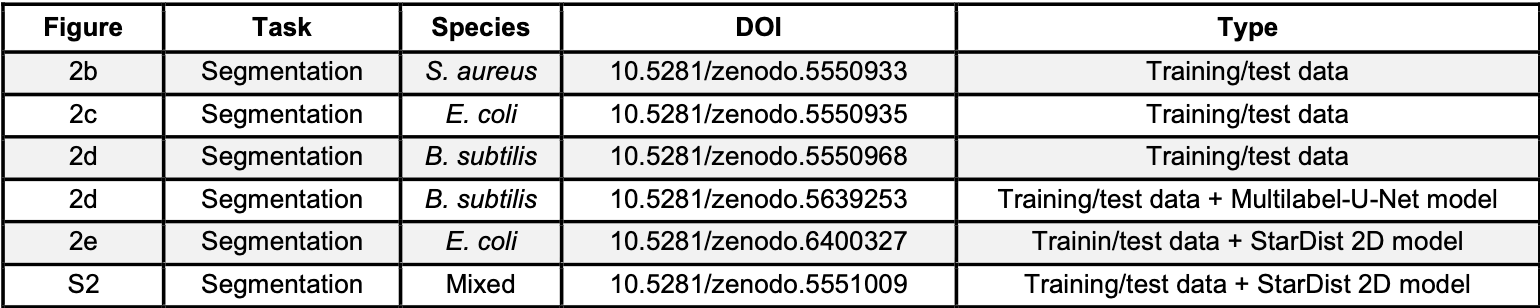
Details:
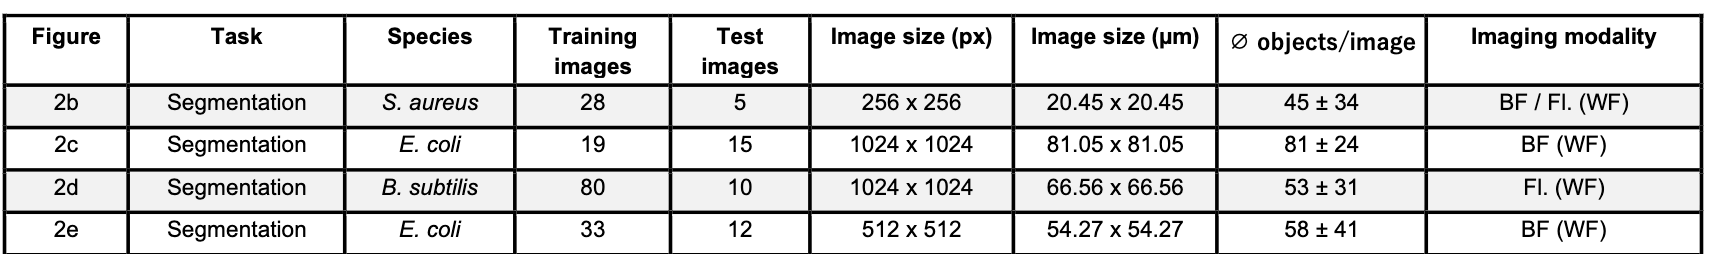

## On Scc The Folder Structure is as follows:

- **2b**
  - A_Segmentation_S.aureus.png
  - **DeepBacs_Data_Segmentation_Staph_Aureus_dataset**
    - **brightfield_dataset**
      - **test**
        - **brightfield** (5 files)
          - JE2NileRed_oilp22_PMP_101220_007.tif
          - JE2NileRed_oilp22_PMP_101220_008.tif
          - *(... 3 more files)*
        - **masks** (5 files)
          - JE2NileRed_oilp22_PMP_101220_007.tif
          - JE2NileRed_oilp22_PMP_101220_008.tif
          - *(... 3 more files)*
      - **train**
        - **full_images**
          - **brightfield** (7 files)
            - JE2NileRed_oilp22_PMP_101220_001.tif
            - JE2NileRed_oilp22_PMP_101220_002.tif
            - *(... 5 more files)*
          - **masks** (7 files)
            - JE2NileRed_oilp22_PMP_101220_001.tif
            - JE2NileRed_oilp22_PMP_101220_002.tif
            - *(... 5 more files)*
        - **patches**
          - **brightfield** (10 files)
            - JE2NileRed_oilp22_PMP_101220_001_1.tif
            - JE2NileRed_oilp22_PMP_101220_001_2.tif
            - *(... 8 more files)*
          - **masks** (10 files)
            - JE2NileRed_oilp22_PMP_101220_001_1.tif
            - JE2NileRed_oilp22_PMP_101220_001_2.tif
            - *(... 8 more files)*
    - **Fiji_Rois**
      - **test** (5 files)
        - JE2NileRed_oilp22_PMP_101220_007.zip
        - JE2NileRed_oilp22_PMP_101220_008.zip
        - *(... 3 more files)*
      - **train** (7 files)
        - JE2NileRed_oilp22_PMP_101220_001.zip
        - JE2NileRed_oilp22_PMP_101220_002.zip
        - *(... 5 more files)*
    - **fluorescence_dataset**
      - *(similar structure as above for test and train)*
  - Notes.txt



In [1]:
!pwd

/projectnb/ec523kb/projects/teams_Fall_2024/Team_2/bacteria_counting/Github-Repo/523DeepBacImprovementProject


In [2]:
# Main folder of datasets
main_folder_path = "/projectnb/ec523kb/projects/teams_Fall_2024/Team_2/bacteria_counting/Data"

In [3]:
# Example images
print("Brightfield")
img_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/brightfield/JE2NileRed_oilp22_PMP_101220_007.tif"
mask_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/masks/JE2NileRed_oilp22_PMP_101220_007.tif"

Brightfield


In [4]:
# Stardist
img_path = "2d/5550968/DeepBacs_Data_Segmentation_B.subtilis_FtsZ_dataset/StarDist_dataset/test/fluorescence/test_1.tif"
mask_path = "2d/5550968/DeepBacs_Data_Segmentation_B.subtilis_FtsZ_dataset/StarDist_dataset/test/masks/test_1.tif"


# Data Augmentation

This is the final output function:
original_image_rgb, mask_image_rgb, final_rgb, final_mask_rgb = process_images(original_image_path, mask_image_path, visualize_individual=True, display_plots=True)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
# Load image and mask
original_image_path = os.path.join(main_folder_path, img_path)
mask_image_path = os.path.join(main_folder_path, mask_path)
original_image = cv2.imread(os.path.join(main_folder_path, img_path))
mask_image = cv2.imread(os.path.join(main_folder_path, mask_path))


In [16]:
import os
import cv2
import numpy as np
import pandas as pd

def augment_images_in_folder(image_folder_path, mask_folder_path, output_folder_path, density_factor):
    # Create main output folder
    if not os.path.exists(output_folder_path):
        os.makedirs(output_folder_path)

    # Create separate folders for augmented images and masks
    augmented_image_folder = os.path.join(output_folder_path, f'augmented_{os.path.basename(image_folder_path)}')
    augmented_mask_folder = os.path.join(output_folder_path, f'augmented_{os.path.basename(mask_folder_path)}')
    
    os.makedirs(augmented_image_folder, exist_ok=True)
    os.makedirs(augmented_mask_folder, exist_ok=True)

    augmentation_info = []
    image_files = [f for f in os.listdir(image_folder_path) if f.endswith(('tif','.png', '.jpg', '.jpeg'))]
    
    for image_file in image_files:
        mask_file = image_file  # Assuming mask files have the same name as image files
        original_image_path = os.path.join(image_folder_path, image_file)
        mask_image_path = os.path.join(mask_folder_path, mask_file)

        original_image_rgb, mask_image_rgb, final_image, final_mask = process_images(
            original_image_path,
            mask_image_path,
            visualize_individual=False,
            display_plots=True,
            density_factor=density_factor
        )

        if final_image is not None and final_mask is not None:
            augmented_image_path = os.path.join(augmented_image_folder, f'augmented_{image_file}')
            augmented_mask_path = os.path.join(augmented_mask_folder, f'augmented_{mask_file}')

            cv2.imwrite(augmented_image_path, cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))
            cv2.imwrite(augmented_mask_path, cv2.cvtColor(final_mask, cv2.COLOR_RGB2BGR))

            augmentation_info.append({
                "original_image": original_image_path,
                "mask": mask_image_path,
                "augmented_image": augmented_image_path,
                "augmented_mask": augmented_mask_path,
                "density_factor": density_factor
            })

    info_df = pd.DataFrame(augmentation_info)
    info_df.to_csv(os.path.join(output_folder_path, 'augmentation_info.csv'), index=False)

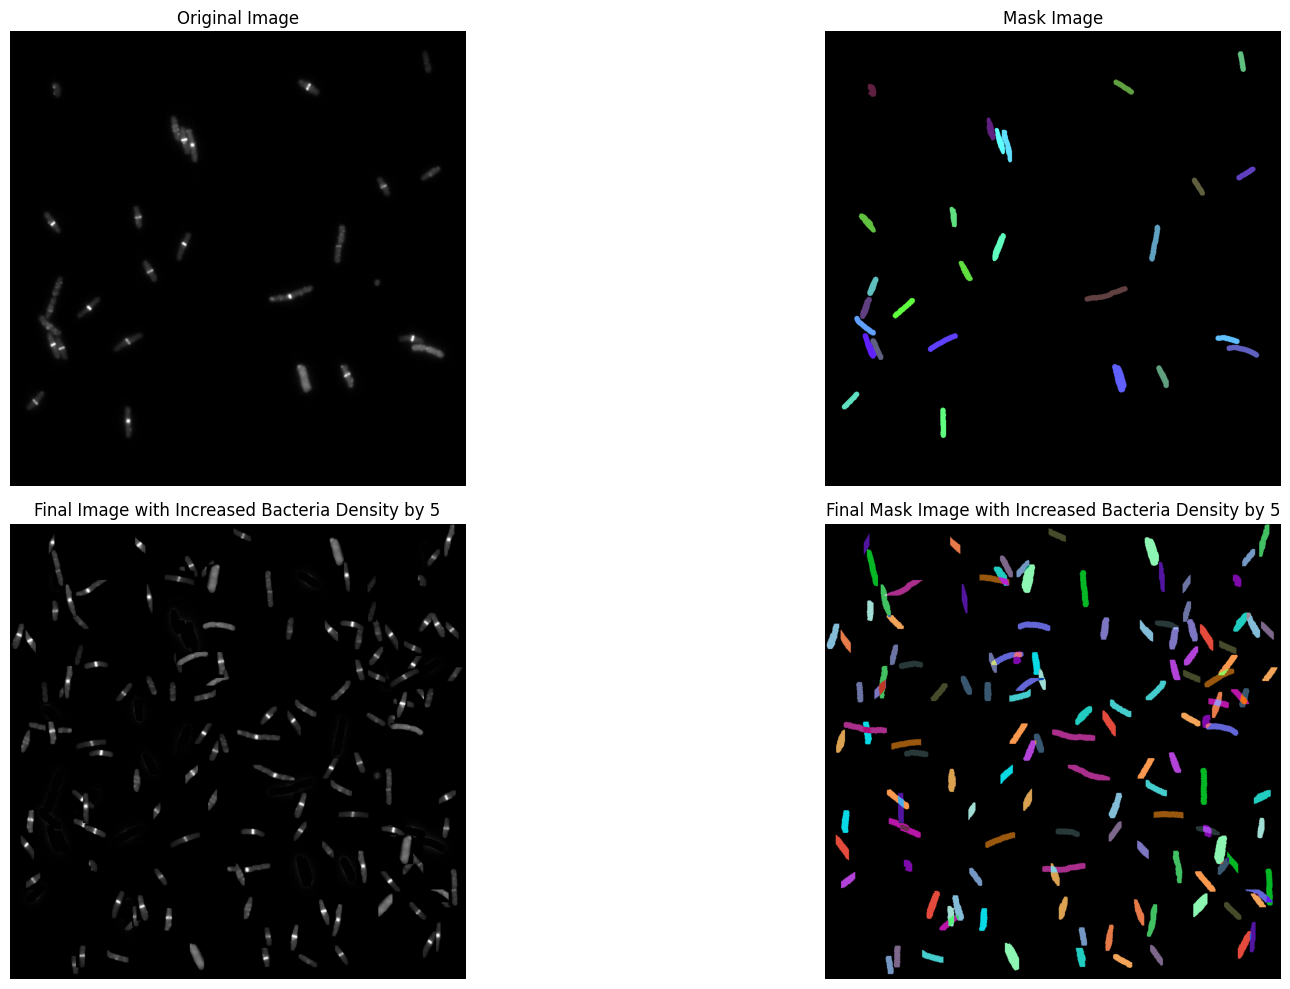

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_unique_colors(image):
    unique_colors = np.unique(image.reshape(-1, 3), axis=0)
    unique_colors = unique_colors[~np.all(unique_colors == [0, 0, 0], axis=1)]
    return unique_colors

def extract_bacteria(original, mask, unique_colors):
    bacteria_dict = {}
    for color in unique_colors:
        color_mask = np.all(mask == color, axis=-1).astype(np.uint8) * 255
        contours, _ = cv2.findContours(color_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if contours:
            contour = contours[0]
            x, y, w, h = cv2.boundingRect(contour)
            bacteria_image = original[y:y+h, x:x+w].copy()
            bacteria_mask = color_mask[y:y+h, x:x+w]
            bacteria_image[bacteria_mask == 0] = [0, 0, 0]  # Set background to black
            bacteria_dict[tuple(color)] = (bacteria_image, bacteria_mask)
    return bacteria_dict

def create_background(original_image, mask_image, dilation_iterations=1):
    # Create a binary mask where bacteria are white and background is black
    gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

    # Dilate the binary mask to make bacteria areas larger
    kernel = np.ones((5, 5), np.uint8)  # Define a kernel for dilation
    dilated_mask = cv2.dilate(binary_mask, kernel, iterations=dilation_iterations)

    # Calculate the median color of the original image excluding bacteria
    masked_image = original_image.copy()
    masked_image[dilated_mask == 255] = 0  # Set dilated bacteria areas to black

    # Calculate median color of non-bacteria pixels
    median_color = np.median(masked_image[masked_image > 0], axis=0).astype(np.uint8)

    # Create a copy of the original image for modification
    modified_image = original_image.copy()

    # Replace dilated bacteria areas with the median color
    modified_image[dilated_mask == 255] = median_color

    return modified_image

def visualize_individual_bacteria(bacteria_dict):
    n_bacteria = len(bacteria_dict)
    cols = 5
    rows = (n_bacteria + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
    axes = axes.flatten()
    
    for i, (color, (bacteria_image, _)) in enumerate(bacteria_dict.items()):
        axes[i].imshow(cv2.cvtColor(bacteria_image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Bacteria {i+1}\nColor: {color}")
        axes[i].axis('off')
    
    for i in range(n_bacteria, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Define a function to generate distinct colors
def generate_unique_colors(num_colors):
    np.random.seed(0)  # For reproducibility
    return np.random.randint(0, 255, size=(num_colors, 3), dtype=np.uint8)

def process_images(original_image_path, mask_image_path, visualize_individual=False, display_plots=False, density_factor=1):
    # Load images
    original_image = cv2.imread(original_image_path)
    mask_image = cv2.imread(mask_image_path)

    if original_image is None or mask_image is None:
        print("Error loading images.")
        return

    # Process images
    unique_colors = get_unique_colors(mask_image)
    bacteria_dict = extract_bacteria(original_image, mask_image, unique_colors)

    # Generate unique colors for each bacterium
    num_bacteria = len(bacteria_dict)
    distinct_colors = generate_unique_colors(num_bacteria)

    # Increase density of bacteria by duplicating them randomly
    dense_bacteria_dict = {}
    for idx, (color, (bacteria_image, bacteria_mask)) in enumerate(bacteria_dict.items()):
        for i in range(density_factor):  # Adjust this factor for density
            
            # Randomly rotate the bacteria image
            angle = np.random.uniform(-30, 30)  # Random angle between -30 and 30 degrees
            center = (bacteria_image.shape[1] // 2, bacteria_image.shape[0] // 2)
            rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
            rotated_bacteria_image = cv2.warpAffine(bacteria_image, rotation_matrix,
                                                     (bacteria_image.shape[1], bacteria_image.shape[0]))
            rotated_bacteria_mask = cv2.warpAffine(bacteria_mask, rotation_matrix,
                                                    (bacteria_mask.shape[1], bacteria_mask.shape[0]))

            # Randomly flip the bacteria image horizontally or vertically
            if np.random.rand() > 0.5:  # Randomly decide to flip
                rotated_bacteria_image = cv2.flip(rotated_bacteria_image, 1)  # Flip horizontally
                rotated_bacteria_mask = cv2.flip(rotated_bacteria_mask, 1)  # Flip mask similarly

            # Randomly position the new bacteria image
            offset_x = np.random.randint(0, original_image.shape[1] - rotated_bacteria_image.shape[1])
            offset_y = np.random.randint(0, original_image.shape[0] - rotated_bacteria_image.shape[0])
            
            # Store the transformed bacteria image and mask with its new position and assigned color
            if idx not in dense_bacteria_dict:
                dense_bacteria_dict[idx] = []
            dense_bacteria_dict[idx].append((rotated_bacteria_image.copy(), rotated_bacteria_mask.copy(), (offset_x, offset_y), distinct_colors[idx]))

    background = create_background(original_image.copy(), mask_image)
    
    final_image, final_mask = place_bacteria_on_background(background.copy(), dense_bacteria_dict)

    # Convert images from BGR to RGB for correct color representation in Matplotlib
    original_image_rgb = cv2.cvtColor(original_image , cv2.COLOR_BGR2RGB)
    mask_image_rgb = cv2.cvtColor(mask_image , cv2.COLOR_BGR2RGB)
    final_rgb = cv2.cvtColor(final_image , cv2.COLOR_BGR2RGB)
    final_mask_rgb = cv2.cvtColor(final_mask , cv2.COLOR_BGR2RGB)

    if display_plots:
        # Display results using Matplotlib in a structured manner
        fig, axes = plt.subplots(2, 2, figsize=(20, 10))

        axes[0,0].imshow(original_image_rgb)
        axes[0,0].set_title('Original Image')
        axes[0,0].axis('off')

        axes[0,1].imshow(mask_image_rgb)
        axes[0,1].set_title('Mask Image')
        axes[0,1].axis('off')

        axes[1,0].imshow(final_rgb)
        axes[1,0].set_title(f'Final Image with Increased Bacteria Density by {density_factor}')
        axes[1,0].axis('off')

        axes[1,1].imshow(final_mask_rgb)
        axes[1,1].set_title(f'Final Mask Image with Increased Bacteria Density by {density_factor}')
        axes[1,1].axis('off')

        plt.tight_layout()
        plt.show()

    return original_image_rgb, mask_image_rgb, final_rgb, final_mask_rgb

def place_bacteria_on_background(background, bacteria_dict):
    h_bg, w_bg = background.shape[:2]
    final_image = background.copy()
    
    # Initialize final_mask with zeros (same shape as background but three channels)
    final_mask = np.zeros((h_bg, w_bg, 3), dtype=np.uint8)  # Create a three-channel mask

    for idx, bacteria_list in bacteria_dict.items():
        for bacteria_image, bacteria_mask, (x_pos, y_pos), color in bacteria_list:
            h_bac, w_bac = bacteria_image.shape[:2]

            # Ensure that the position does not exceed the background dimensions
            x_pos = min(x_pos, w_bg - w_bac)
            y_pos = min(y_pos, h_bg - h_bac)

            # Place the bacteria image on the background
            final_image[y_pos:y_pos + h_bac, x_pos:x_pos + w_bac] = bacteria_image

            # Create a colored mask for this bacterium using its assigned unique color
            colored_mask = np.zeros_like(final_mask)  # Create a colored mask for this bacterium
            colored_mask[y_pos:y_pos + h_bac,x_pos:x_pos + w_bac] += ((bacteria_mask > 0).astype(np.uint8).reshape(h_bac,w_bac,-1) * color).astype(np.uint8)

            # Update final mask using np.add with casting to avoid type issues
            final_mask[y_pos:y_pos + h_bac,x_pos:x_pos + w_bac] += colored_mask[y_pos:y_pos + h_bac,x_pos:x_pos + w_bac]

    return final_image.astype(np.uint8), final_mask.astype(np.uint8)

# Example usage:
original_image_rgb, mask_image_rgb, final_rgb, final_mask_rgb= process_images(
    original_image_path,
    mask_image_path,
    visualize_individual=False,
    display_plots=True,
    density_factor=5  
)

In [9]:
# Example images brightfield
img_folder_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/brightfield"
mask_folder_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/masks"

img_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/brightfield/JE2NileRed_oilp22_PMP_101220_007.tif"
mask_path = "2b/DeepBacs_Data_Segmentation_Staph_Aureus_dataset/brightfield_dataset/test/masks/JE2NileRed_oilp22_PMP_101220_007.tif"


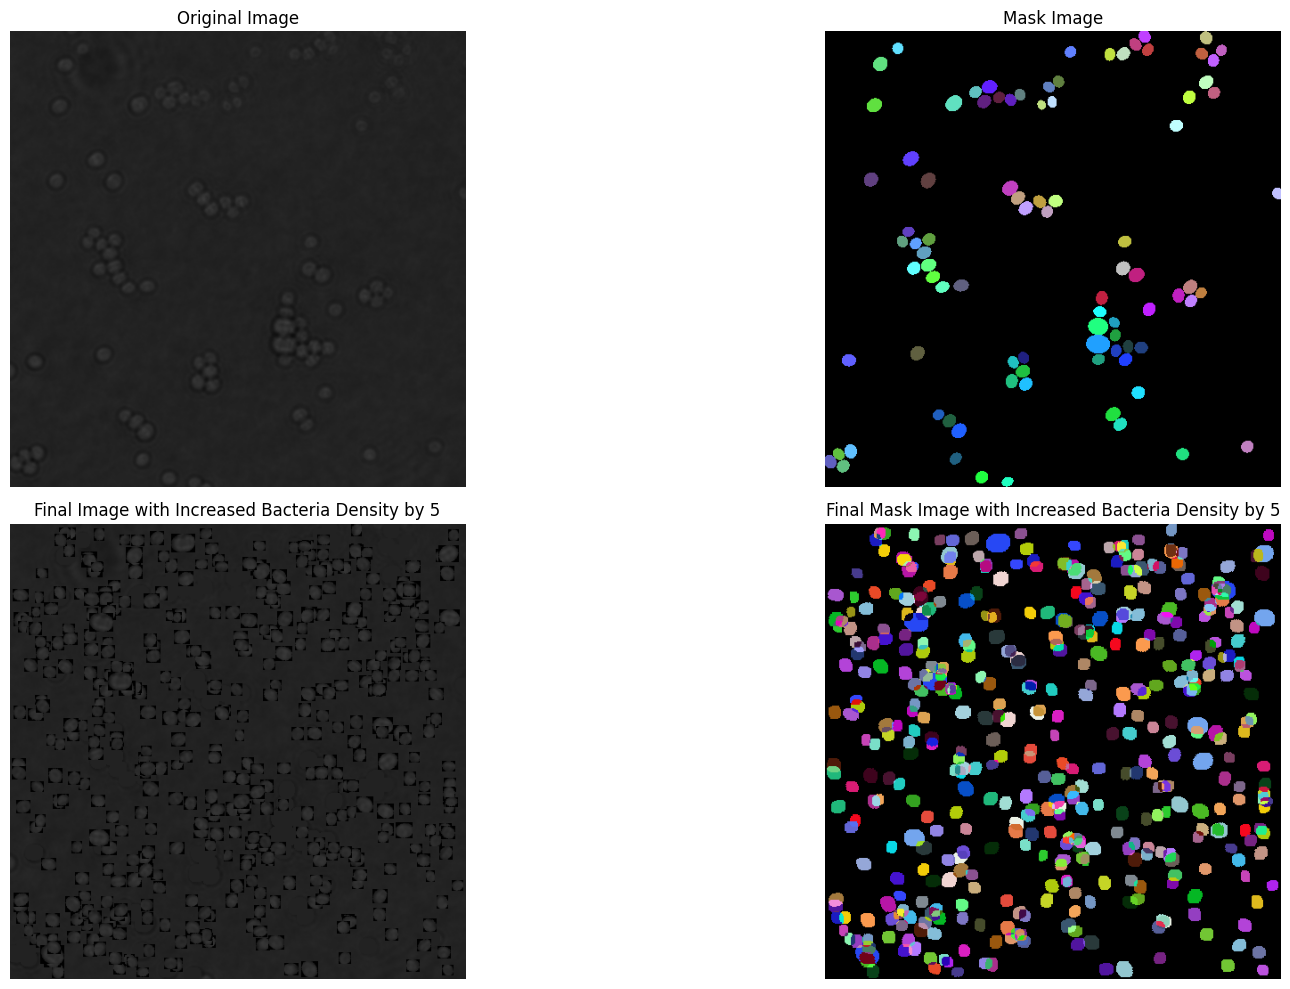

In [10]:
# Main folder of datasets
main_folder_path = "/projectnb/ec523kb/projects/teams_Fall_2024/Team_2/bacteria_counting/Data"

# Load image and mask
image_folder_path = os.path.join(main_folder_path, img_folder_path)
mask_folder_path = os.path.join(main_folder_path, mask_folder_path)

output_folder_name = 'augmented_' + os.path.basename(image_folder_path)
output_folder_path = os.path.join(os.path.dirname(image_folder_path), output_folder_name)  # Save alongside input folder

# Load image and mask
original_image_path = os.path.join(main_folder_path, img_path)
mask_image_path = os.path.join(main_folder_path, mask_path)
density_factor = 5

# Example usage:
original_image_rgb, mask_image_rgb, final_rgb, final_mask_rgb = process_images(
    original_image_path,
    mask_image_path,
    visualize_individual=False,
    display_plots=True,
    density_factor=density_factor  # Adjust this value as needed for testing
)

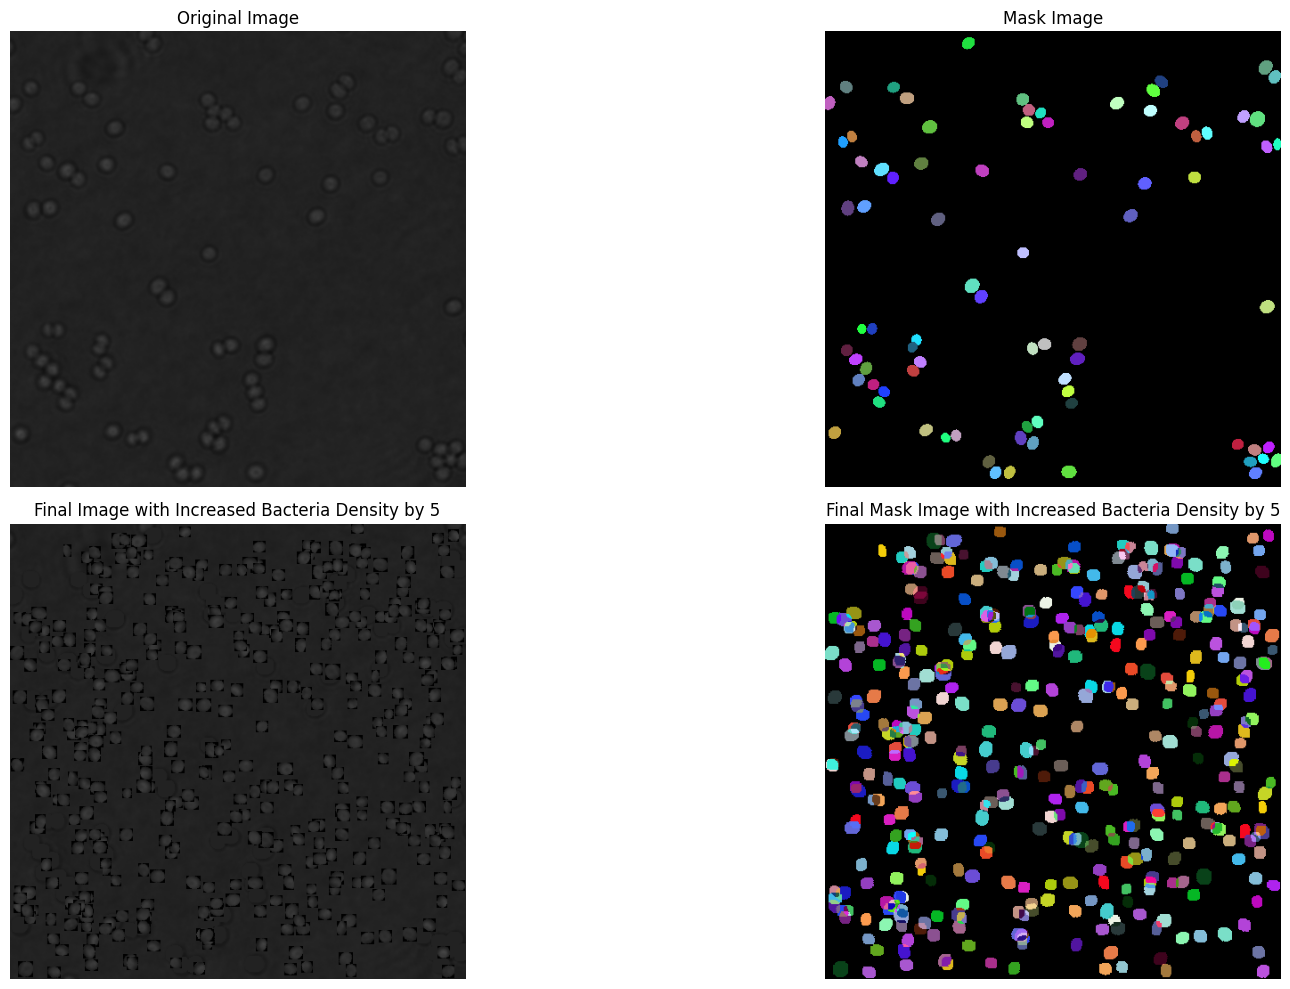

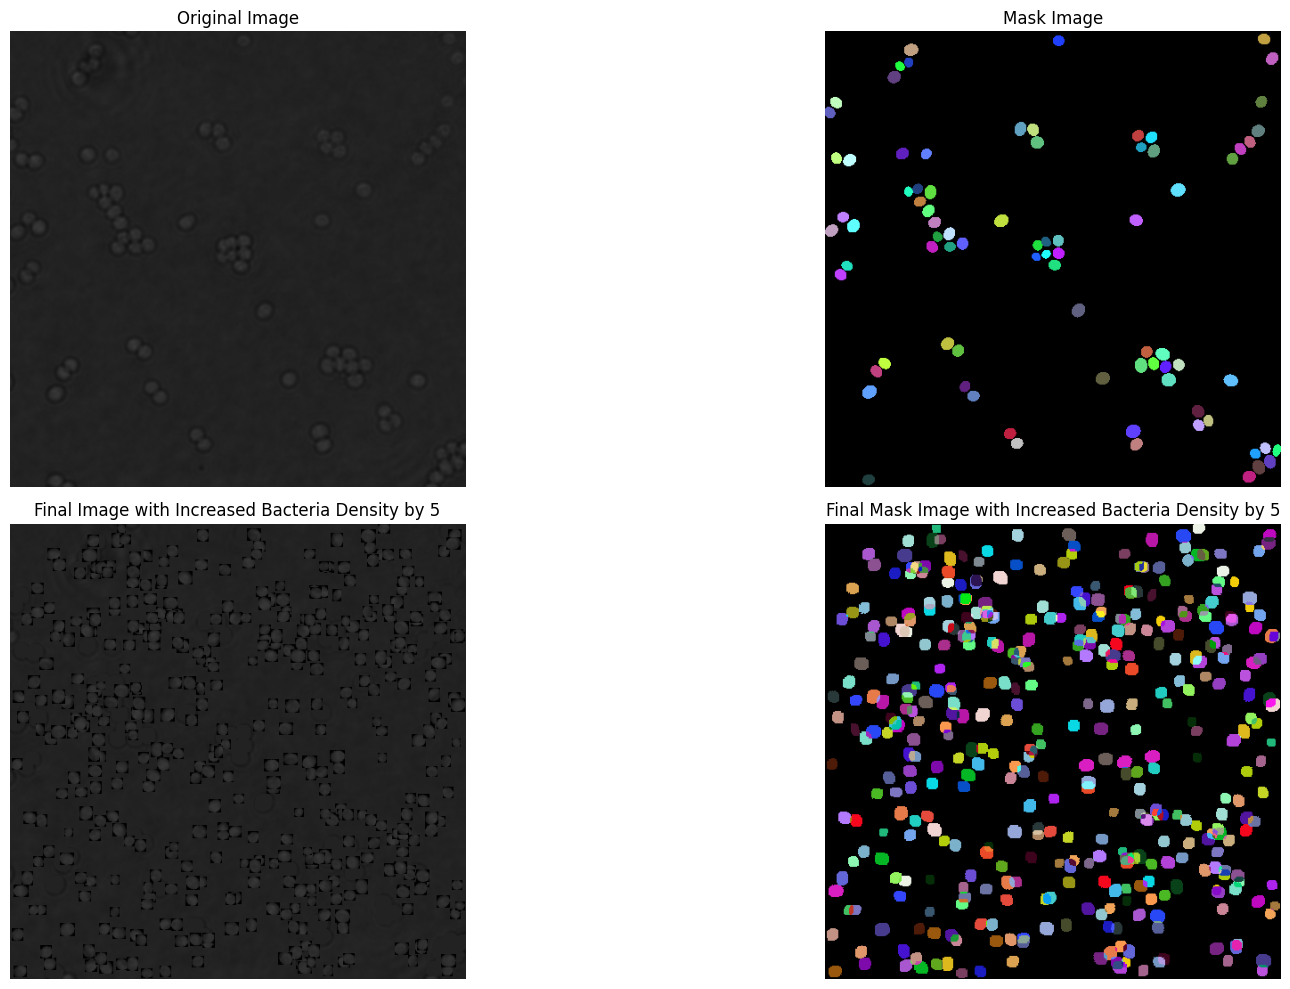

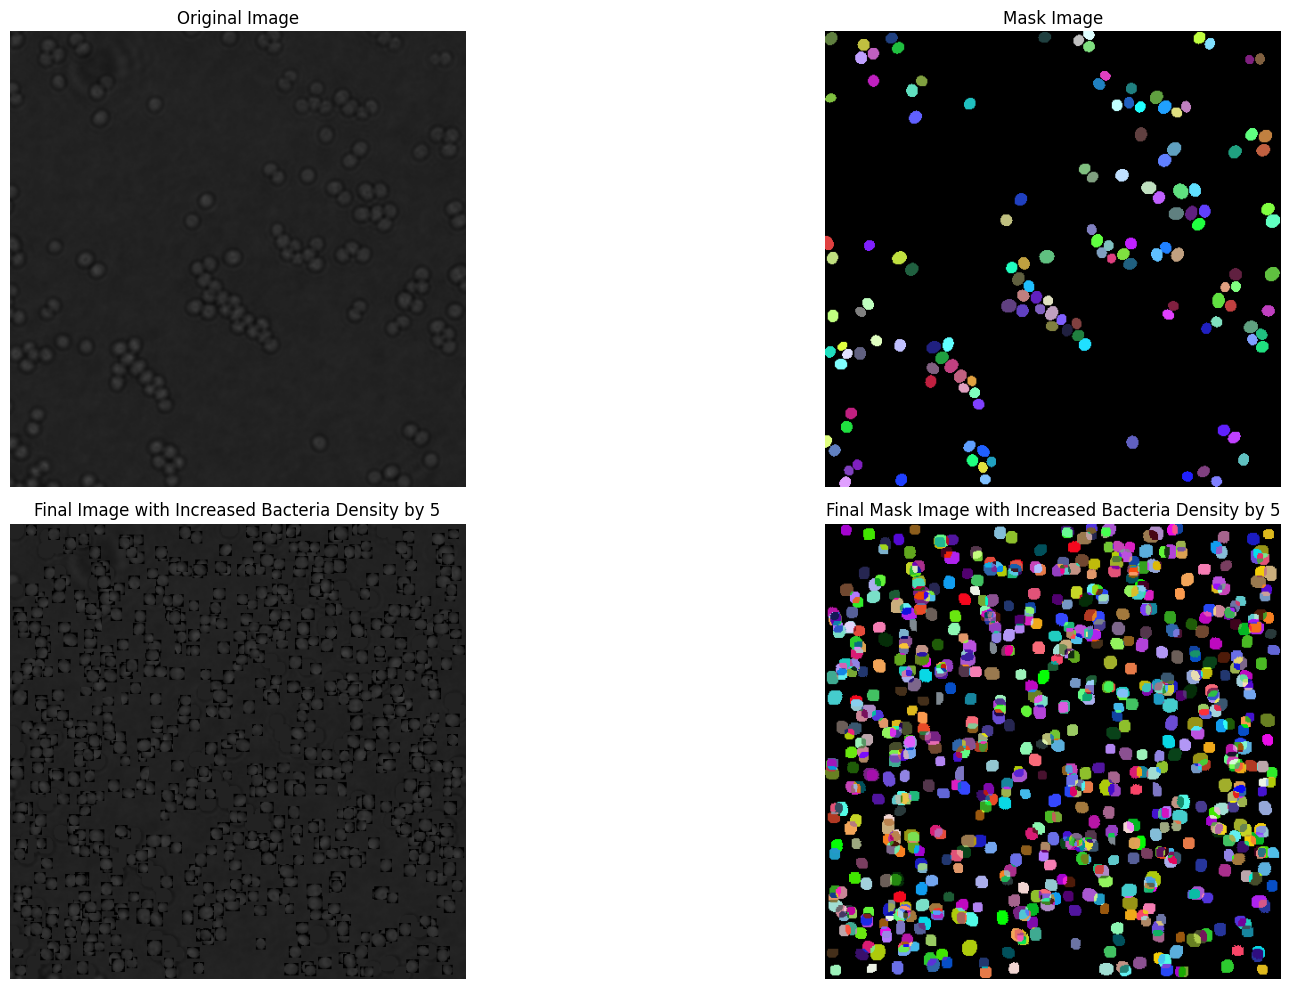

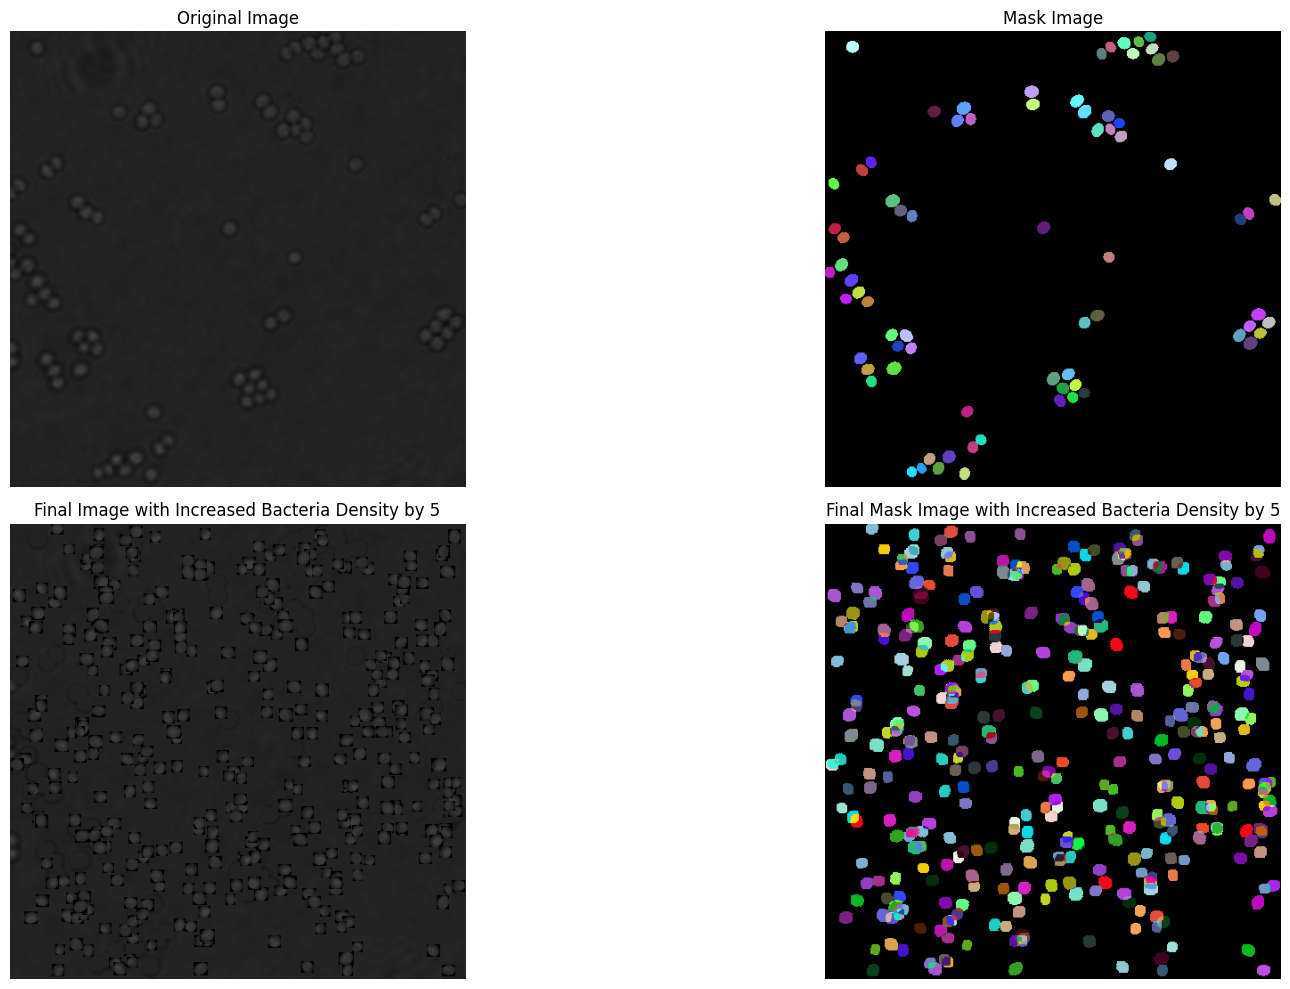

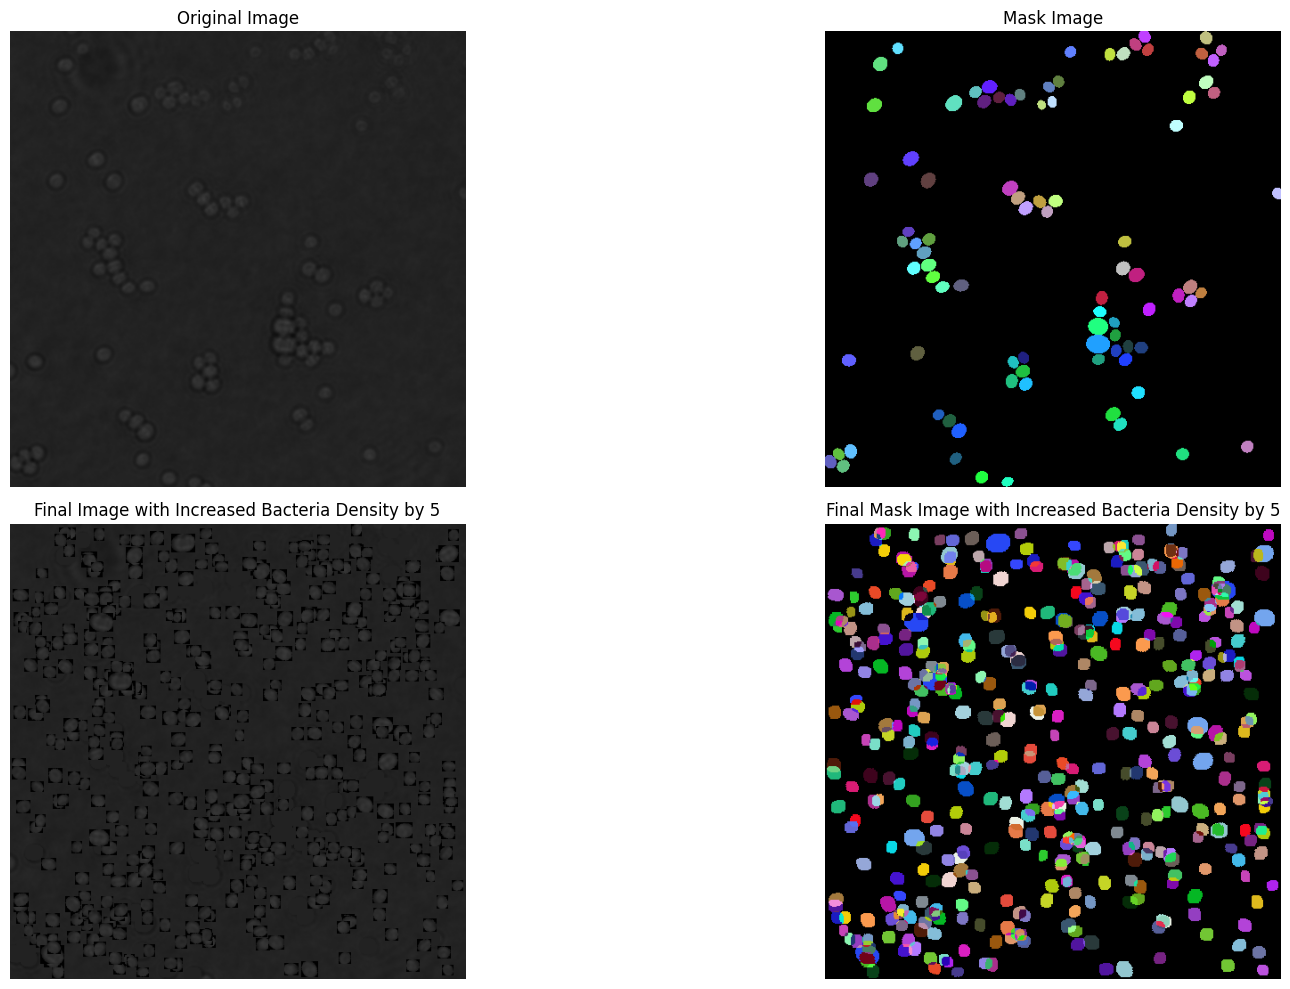

In [17]:
# Call the function to augment images in the specified folder
augment_images_in_folder(image_folder_path, mask_folder_path, output_folder_path, density_factor)